--- Dataset Head ---
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26

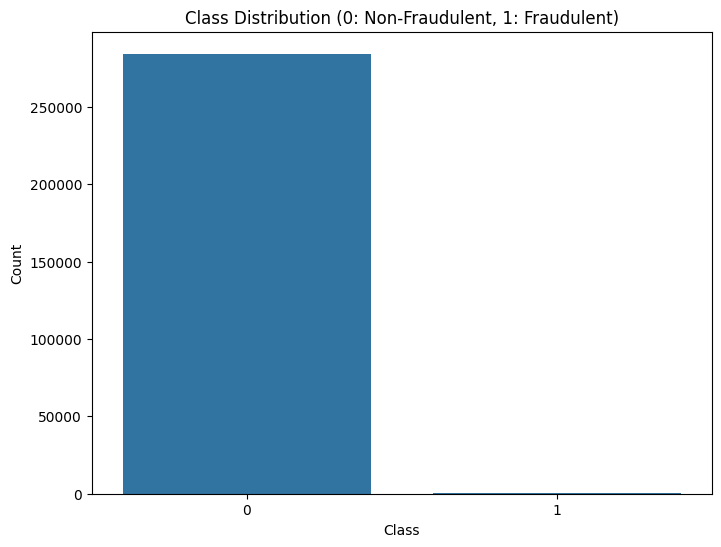


--- Balanced Dataset Class Distribution ---
Class
0    492
1    492
Name: count, dtype: int64

--- Training the RandomForest model ---
Model training complete.

--- Model Evaluation ---
Accuracy: 0.9289
Precision: 0.9706
Recall: 0.9000
F1-Score: 0.9340

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.88      0.97      0.92        87
           1       0.97      0.90      0.93       110

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197


--- Confusion Matrix ---
[[84  3]
 [11 99]]


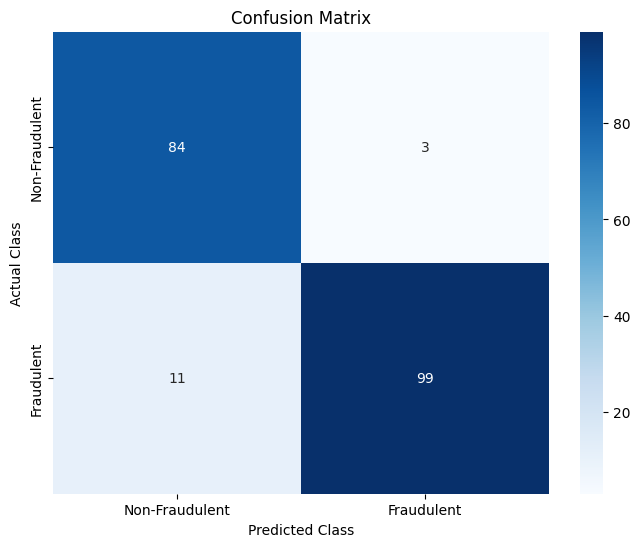


--- Top 10 Feature Importances ---
   feature  importance
15     V14    0.189614
13     V12    0.135447
11     V10    0.097279
5       V4    0.094185
12     V11    0.078375
18     V17    0.067740
4       V3    0.050493
8       V7    0.031887
17     V16    0.029831
3       V2    0.025657


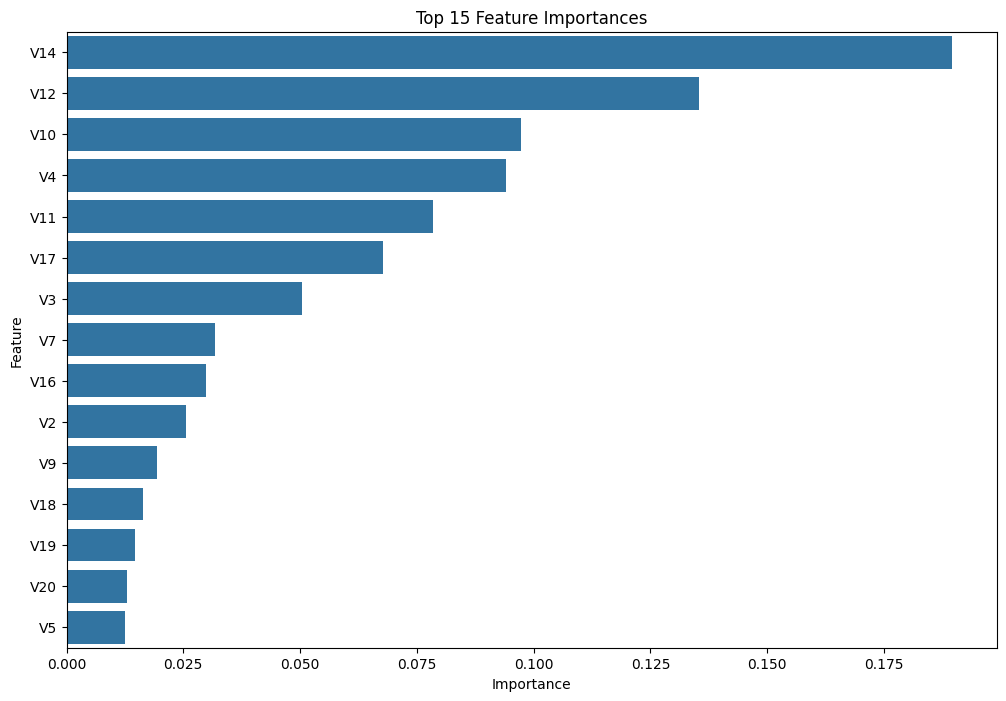

In [1]:
# Credit Card Fraud Detection Project
# This script builds a machine learning model to detect fraudulent credit card transactions.

# 1. Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data Loading and Initial Exploration ---

# Load the dataset from the provided URL
# This dataset is from Kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
try:
    data = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')
except Exception as e:
    print(f"Error loading the dataset: {e}")
    print("Please make sure you have an internet connection to download the dataset.")
    exit()


print("--- Dataset Head ---")
print(data.head())
print("\n--- Dataset Info ---")
data.info()
print("\n--- Dataset Description ---")
print(data.describe())

# Check for missing values
print("\n--- Missing Values ---")
print(data.isnull().sum().max())

# --- Data Preprocessing ---

# The 'Time' and 'Amount' features are not scaled like the other 'V' features.
# We'll scale them using StandardScaler.
scaler = StandardScaler()
data['scaled_amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))
data['scaled_time'] = scaler.fit_transform(data['Time'].values.reshape(-1, 1))

# Drop the original 'Time' and 'Amount' columns
data.drop(['Time', 'Amount'], axis=1, inplace=True)

# Move the 'Class' column to the end
scaled_amount = data['scaled_amount']
scaled_time = data['scaled_time']
data.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
data.insert(0, 'scaled_amount', scaled_amount)
data.insert(1, 'scaled_time', scaled_time)

print("\n--- Preprocessed Data Head ---")
print(data.head())


# --- Exploratory Data Analysis (EDA) ---

# Check the distribution of the 'Class' variable
print("\n--- Class Distribution ---")
class_distribution = data['Class'].value_counts()
print(class_distribution)

# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0: Non-Fraudulent, 1: Fraudulent)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

# --- Handling Imbalanced Data ---

# The dataset is highly imbalanced. We will use Random Undersampling to balance it.
# This involves randomly removing samples from the majority class (non-fraudulent transactions).

# Separate the classes
fraudulent = data[data['Class'] == 1]
non_fraudulent = data[data['Class'] == 0]

# Get the number of fraudulent transactions
num_fraudulent = len(fraudulent)

# Randomly sample the non-fraudulent transactions to match the number of fraudulent ones
non_fraudulent_undersampled = non_fraudulent.sample(n=num_fraudulent, random_state=42)

# Concatenate the two dataframes to create a balanced dataset
balanced_data = pd.concat([fraudulent, non_fraudulent_undersampled])

# Shuffle the balanced dataset
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

print("\n--- Balanced Dataset Class Distribution ---")
print(balanced_data['Class'].value_counts())


# --- Model Training ---

# Define features (X) and target (y)
X = balanced_data.drop('Class', axis=1)
y = balanced_data['Class']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the RandomForestClassifier
# RandomForest is a good choice as it's robust and handles non-linear relationships well.
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
print("\n--- Training the RandomForest model ---")
model.fit(X_train, y_train)
print("Model training complete.")

# --- Model Evaluation ---

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
print("\n--- Model Evaluation ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

# Display the classification report
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\n--- Confusion Matrix ---")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Fraudulent', 'Fraudulent'],
            yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

# --- Feature Importance ---

# Get feature importances from the trained model
importances = model.feature_importances_
feature_names = X.columns

# Create a dataframe for feature importances
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

print("\n--- Top 10 Feature Importances ---")
print(feature_importance_df.head(10))

# Visualize feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance_df.head(15))
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

